<a href="https://colab.research.google.com/github/abhikashyap/projects/blob/main/value_today_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I am going to scrape value.today for indian companies
- Steps
  - Collect all the links
  - Extract all the link's html data
  - Extract all companies from those html file 
  - Extract various information from all companies
  - load all data to pandas dataframe
  - export csv for further analysis


In [302]:
import requests
from bs4 import BeautifulSoup
import pandas

# Collection of links
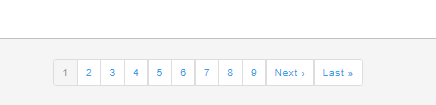
- Checks condition whether current page is last page 
- If current page is last page stop generating links
- If cureent page is not last page , download information of webpage
- Store webpage data

In [303]:
soups=[]
i=0
response=requests.get(f"https://www.value.today/headquarters/india?title=&field_headquarters_of_company_target_id&field_company_category_primary_target_id&field_company_website_uri=&field_market_value_jan072022_value=&page={i}")
page_content=response.text
soup=BeautifulSoup(page_content,"html.parser")

while i != -1:
  if soup.find_all("li", {"class": "pager__item pager__item--next"}):
    response=requests.get(f"https://www.value.today/headquarters/india?title=&field_headquarters_of_company_target_id&field_company_category_primary_target_id&field_company_website_uri=&field_market_value_jan072022_value=&page={i}")
    page_content=response.text
    soup=BeautifulSoup(page_content,"html.parser")
    soups.append(soup)

    #print(f"https://www.value.today/headquarters/india?title=&field_headquarters_of_company_target_id&field_company_category_primary_target_id&field_company_website_uri=&field_market_value_jan072022_value=&page={i}")
    i+=1
  else:
    i = -1

# Extraction
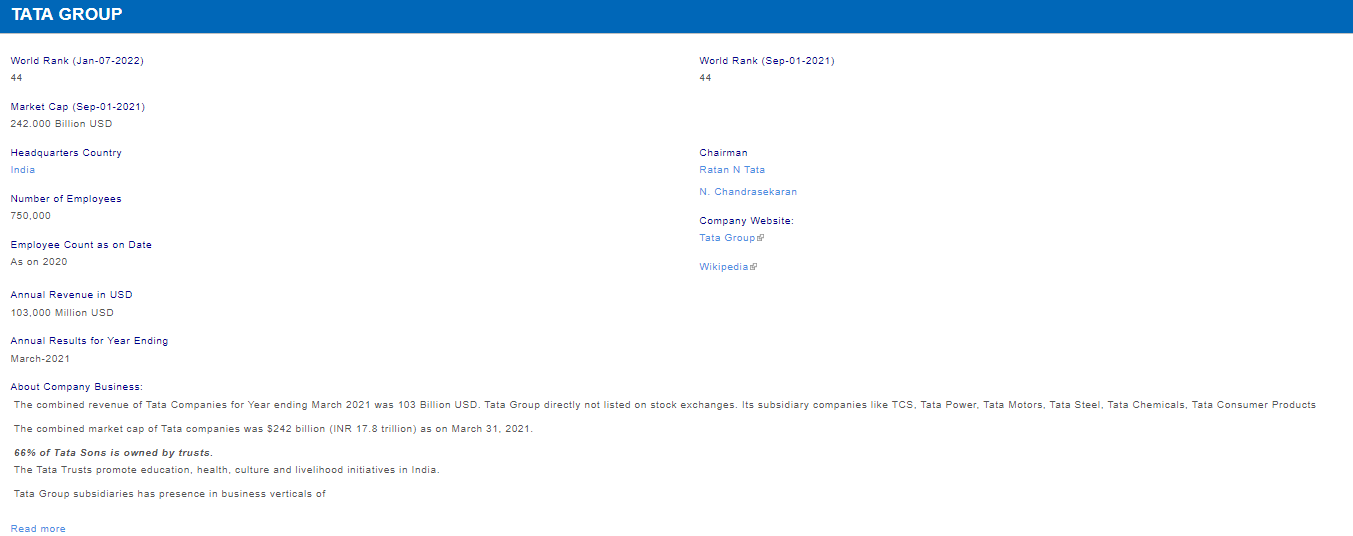
- Segregate all individual company data
- segregate different informations of individual company data
-Convert individual data in required format

## segregation of all individual company data

In [304]:
companies=[]
for soup in soups: 
  company=soup.find_all("li","row well clearfix")
  for element in company:
    companies.append(element)

## Challenges occured while collecting different informations
-  All companies doesn't have all type of information,so a same approach can't be implemented to all the companies
- Many data is missing, so in place of missing data null is imputed
- For same type of information we have mutiple values ,so all values should be picked
- Different types of data like text and links are needed to extract in order to enhance this process




In [305]:
# extract company_name
company_name=[]
for company in companies:
  company_name.append(company.find("div","field field--name-node-title field--type-ds field--label-hidden field--item").text.strip())

In [306]:
len(companies)

1000

## Function written to check if data is present or not

In [307]:
def find_tag(file,tag,class_= None):
  if file.find(tag,class_):
    return file.find(tag,class_)
  else:
    return "null"

## Function written to pull out single data if present otherwise return null 
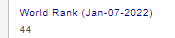

In [308]:
# extracts information
def extract(class_):
  out=[]
  for company in companies:
    data=company.find("div",class_)
    if data == None:
      ans = "null"
      out.append(ans)
    else:
      file = data
      ans=file.find("div","field--item").text
      out.append(ans)
  return(out)

## Function written to pull out multiple data if present otherwise return null 
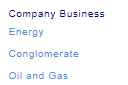


In [309]:
# extracts more than one information
def extract_more(class_):
  out=[]
  for company in companies:
    data=company.find("div",class_)
    if data == None:
      ans = "null"
      out.append(ans)
    else:
      data_to_extract=data.find("div","field--items")
      files = data_to_extract.find_all("div","field--item")
      intermediate = []
      for file in files:
        intermediate.append(file.text)
      out.append(intermediate)
  return out

# Extracting various parameters by implementing the functions created above for different scenarios

In [310]:
# extract World Rank_2022_jan
world_rank_2022_jan=extract("clearfix col-sm-6 field field--name-field-world-rank-jan072022 field--type-integer field--label-above")

In [311]:
# extract market value_jan_2022
market_value_2022_jan = extract("clearfix col-sm-6 field field--name-field-market-value-jan072022 field--type-float field--label-above")

In [312]:
# extract world_rank 2021_sept
world_rank_2021_sept =extract("clearfix col-sm-6 field field--name-field-world-rank-sep-01-2021- field--type-integer field--label-above")

In [313]:
# extract market_cap_2021_sept
market_cap_2021_sept =extract("clearfix col-sm-6 field field--name-field-market-cap-aug-01-2021- field--type-float field--label-above")

In [314]:
# extract world_rank_jan_2021
class_="clearfix col-sm-6 field field--name-field-world-rank-jan012021 field--type-integer field--label-above"
world_rank_jan_2021 = extract(class_)

In [315]:
# extract market_value_jan_2021
class_="clearfix col-sm-6 field field--name-field-market-value-jan012021 field--type-float field--label-above"
market_value_jan_2021 = extract(class_)

In [316]:
# extract world_rank_jan_2020
class_="clearfix col-sm-6 field field--name-field-world-rank-jan-2020 field--type-integer field--label-above"
world_rank_jan_2020 = extract(class_)

In [317]:
# extract market_value_jan_2020
class_="clearfix col-sm-6 field field--name-field-market-value-jan-2020 field--type-float field--label-above"
market_value_jan_2020 = extract(class_)

In [318]:
# Headquarters_Country

class_="clearfix col-sm-12 field field--name-field-headquarters-of-company field--type-entity-reference field--label-above"
Headquarters_Country = extract(class_)

In [319]:
# Chairman

class_="clearfix col-sm-12 field field--name-field-chairman field--type-entity-reference field--label-above"
Chairman = extract(class_)

In [320]:
# ISIN Code:

class_="clearfix col-sm-12 field field--name-field-isin-code field--type-string field--label-above"
ISIN_Code = extract(class_)

In [321]:
# Company_Business:

class_="clearfix col-sm-12 category-button field field--name-field-company-category-primary field--type-entity-reference field--label-above"
Company_Business = extract_more(class_)

In [322]:
# Stock_Exchange:

class_="clearfix col-sm-12 field field--name-field-stock-exchange-lc field--type-entity-reference field--label-inline"
Stock_Exchange = extract_more(class_)

In [323]:
# Stock_Category:

class_="clearfix col-sm-12 field field--name-field-stock-category-lc field--type-entity-reference field--label-inline"
Stock_Category = extract_more(class_)

In [324]:
# Number_of_Employees:

class_="clearfix col-sm-12 field field--name-field-employee-count field--type-integer field--label-inline"
Number_of_Employees = extract(class_)

In [325]:
# Rank_in_Country_2021:

class_="clearfix col-sm-12 field field--name-field-company-rank-in-country-in field--type-string field--label-inline"
Rank_in_Country_2021 = extract(class_)

In [326]:
# Annual Revenue in USD:

class_="clearfix col-sm-12 field field--name-field-revenue-in-usd field--type-float field--label-inline"
Annua_Revenue_in_USD = extract(class_)

In [327]:
# Annual_Net_Income_in_USD:

class_="clearfix col-sm-12 field field--name-field-net-income-in-usd field--type-float field--label-inline"
Annual_Net_Income_in_USD = extract(class_)

In [328]:
# read_more
read_more = [ ]
for company in companies:
  data=company.find("div","field field--name-node-link field--type-ds field--label-hidden field--item")
  last_part=data.find("a","clearfix col-sm-12").get('href')
  final_link ="www.value.today"+last_part
  read_more.append(final_link)

# Segregated and stored data

In [329]:

dic = {"company_name":company_name,"world_rank_2022_jan":world_rank_2022_jan,"world_rank_2021_sept":world_rank_2021_sept,
       "market_cap_2021_sept":market_cap_2021_sept,
       "world_rank_jan_2021" :world_rank_jan_2021,
       "market_value_jan_2021":market_value_jan_2021,
       "world_rank_jan_2020":world_rank_jan_2020,
       "Headquarters_Country":Headquarters_Country,
       "Chairman":Chairman,
       "ISIN_Code":ISIN_Code,
       "Company_Business":Company_Business,
       "Stock_Exchange":Stock_Exchange,
       "Stock_Category":Stock_Category,
       "Number_of_Employees":Number_of_Employees,
       "Rank_in_Country_2021":Rank_in_Country_2021,
       "Annua_Revenue_in_USD":Annua_Revenue_in_USD,
       "Annual_Net_Income_in_USD":Annual_Net_Income_in_USD,
       "read_more":read_more
}

# Data converted to a dataframe for analysis

In [330]:
pd.DataFrame.from_dict(dic)

,company_name,world_rank_2022_jan,world_rank_2021_sept,market_cap_2021_sept,world_rank_jan_2021,market_value_jan_2021,world_rank_jan_2020,Headquarters_Country,Chairman,ISIN_Code,Company_Business,Stock_Exchange,Stock_Category,Number_of_Employees,Rank_in_Country_2021,Annua_Revenue_in_USD,Annual_Net_Income_in_USD,read_more
0,TATA GROUP,44,44,242.000 Billion USD,null,null,null,India,Ratan N Tata,null,null,null,null,"750,000",null,"103,000 Million USD",null,www.value.today/company/tata-group
1,RELIANCE INDUSTRIES,54,52,214.910 Billion USD,56,178.950 Billion USD,70,India,Mukesh Ambani,INE002A01018,"[Energy, Conglomerate, Oil and Gas]","[BSE, Frankfurt, NSE]","[S&P BSE OIL and GAS, S&P BSE ENERGY, BSE-100 ...","236,330",Company Rank in India in 2021 is 1,"87,614 Million USD","7,598 Million USD",www.value.today/company/reliance-industries
2,TATA CONSULTANCY SERVICES (TCS),65,61,195.160 Billion USD,78,150.000 Billion USD,97,India,N. Chandrasekaran,INE467B01029,"[Technology, Software and IT, Software Consult...","[BSE, NSE]","[S&P BSE SOFTWARE and IT, S&P BSE TECHNOLOGY, ...","606,331",Company Rank in India in 2021 is 2,"24,002 Million USD","4,797 Million USD",www.value.today/company/tata-consultancy-servi...
3,HDFC BANK,127,128,121.600 Billion USD,118,107.380 Billion USD,120,India,Atanu Chakraborty,INE040A01034,"[Financial Services, Banking Services]","[BSE, NYSE]","[S&P BSE BANKEX, S&P BSE FINANCE, BSE-100 Inde...","120,093",Company Rank in India in 2021 is 3,"12,743 Million USD","4,825 Million USD",www.value.today/company/hdfc-bank
4,INFOSYS,149,155,101.040 Billion USD,202,72.539 Billion USD,335,India,N.r. Narayana Murthy,INE009A01021,"[Technology, Software and IT, Software Products]","[BSE, Frankfurt, NYSE]","[S&P BSE SOFTWARE and IT, S&P BSE TECHNOLOGY, ...","335,186",Company Rank in India in 2021 is 5,"16,311 Million USD","2,968 Million USD",www.value.today/company/infosys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SOUTHERN PETROCHEMICAL INDUSTRIES CORPORATION,"20,668","21,629",0.148 Billion USD,19589,0.068 Billion USD,21309,India,null,INE147A01011,"[Basic Materials, Chemicals, Petrochemicals]",[BSE],null,null,Company Rank in India in 2021 is 894,null,null,www.value.today/company/southern-petrochemical...
996,BHAGERIA INDUSTRIES,"20,687","21,756",0.145 Billion USD,18193,0.100 Billion USD,20353,India,null,INE354C01027,"[Basic Materials, Chemicals]",[BSE],[S&P BSE BASIC MATERIALS],null,Company Rank in India in 2021 is 793,null,null,www.value.today/company/bhageria-industries
997,FUTURE LIFESTYLE FASHIONS,"20,695","21,797",0.144 Billion USD,14693,0.241 Billion USD,7139,India,null,INE452O01016,"[Consumer Cyclical, Retail]","[BSE, NSE]",[S&P BSE CDGS],null,Company Rank in India in 2021 is 564,296 Million USD,-118 Million USD,www.value.today/company/future-lifestyle-fashions
998,CAPACIT'E INFRAPROJECTS,"20,722","22,036",0.139 Billion USD,16085,0.173 Billion USD,16429,India,null,INE264T01014,"[Industries, Construction]",[BSE],[S&P BSE INDUSTRIALS],null,Company Rank in India in 2021 is 637,null,null,www.value.today/company/capacite-infraprojects


# data converted to csv